# **1. Dataset Introduction**


The **Extrovert vs Introvert Behavior Data** dataset, created by **Rakesh Kapilavai** on Kaggle, provides a structured collection of behavioral attributes used to differentiate between **introverted** and **extroverted** personality types. It draws on psychological and social behavior patterns to explore how personality influences daily actions.

The dataset contains 2,900 rows (individual observations) and 8 columns, including (7) feature columns and a final target column labeled "Personality".

**Column Descriptions**

| Column Name | Description | Data Type | Value/Range |
| :--- | :--- | :--- | :--- |
| **Time_spent_Alone** | The number of hours the person spends alone on a daily basis. | Numeric | 0 - 11 |
| **Stage_fear** | Indicates whether the individual has a fear of being on stage (stage fright). | Categorical | "Yes" / "No" |
| **Social_event_attendance** | The frequency with which the person attends social events. | Numeric | 0 - 10 |
| **Going_outside** | The frequency of the person going outside in a typical week. | Numeric | 0 - 7 |
| **Drained_after_socializing**| Indicates if the person feels emotionally or mentally drained after social interactions. | Categorical | "Yes" / "No" |
| **Friends_circle_size** | The number of close friends the individual has. | Numeric | 0 - 15 |
| **Post_frequency** | How often the person posts on social media platforms. | Numeric | 0 - 10 |
| **Personality** | The target variable, classifying the person's personality type. | Categorical | "Extrovert" / "Introvert" |

**Source**: [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data)

# **2. Import Library**

In [175]:
# function to write module names and versions to a requirements file
def write_requirements(filename, *modules):
    with open(filename, "w") as f:
        for mod in modules:
            f.write(f"{mod.__name__}=={mod.__version__}\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

write_requirements("requirements.txt", pd)

# **3. Load Dataset**

In [177]:
dataset = pd.read_csv("../personality_raw.csv")
dataset.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

## Statistic Descriptive

In [178]:
dataset.describe(include="all")

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


Insights:
* Extroverts are the most common personality type in this dataset.
  * **1491** out of **2900** individuals (~51.4%) are classified as Extroverts.
* **Stage Fear**: 50.1% of individuals responded No, indicating they don't have stage fear (1417 out of 2827).
* **Drained After Socializing**: Similarly, 1441 out of 2848 (~50.6%) said No, meaning they do not feel drained, which may correlate with extroversion.
* **Time Spent Alone** shows a wide range and standard deviation, suggesting variation in personal solitude preferences.
* **Friends Circle Size** has a relatively high max (15) and mean (6.27), indicating that some individuals have notably large social groups.
* **Post Frequency** being above the midpoint (mean ~3.56) suggests moderate social media engagement.
* All variables have slightly different counts, indicating some missing data (e.g., `Stage_fear` has 2827 vs. 2900 for `Personality`).

### Missing Value

In [179]:
na_counts = dataset.isna().sum()
na_ratios = na_counts / len(dataset) * 100

print(f"{'Column':<28}{'Number of NaN':<17}{'>20% of total'}")

for col in dataset.columns:
    n_nan = na_counts[col]
    if n_nan > 0:
        print(f"{col:<33}{n_nan:<17}{'Yes' if na_ratios[col] > 20 else 'No'}")

Column                      Number of NaN    >20% of total
Time_spent_Alone                 63               No
Stage_fear                       73               No
Social_event_attendance          62               No
Going_outside                    66               No
Drained_after_socializing        52               No
Friends_circle_size              77               No
Post_frequency                   65               No


Insight:
* All columns have **less than 20% missing values**, suggesting that imputation is reasonable and data quality is acceptable.
* The column with the most missing data is **Friends_circle_size (77 missing values)**, but it still doesn’t exceed the 20% threshold.

### Duplicate Value

In [180]:
print("There are", dataset.duplicated().sum(), "duplicated rows in the dataset.")

There are 388 duplicated rows in the dataset.


## Univariate Analysis

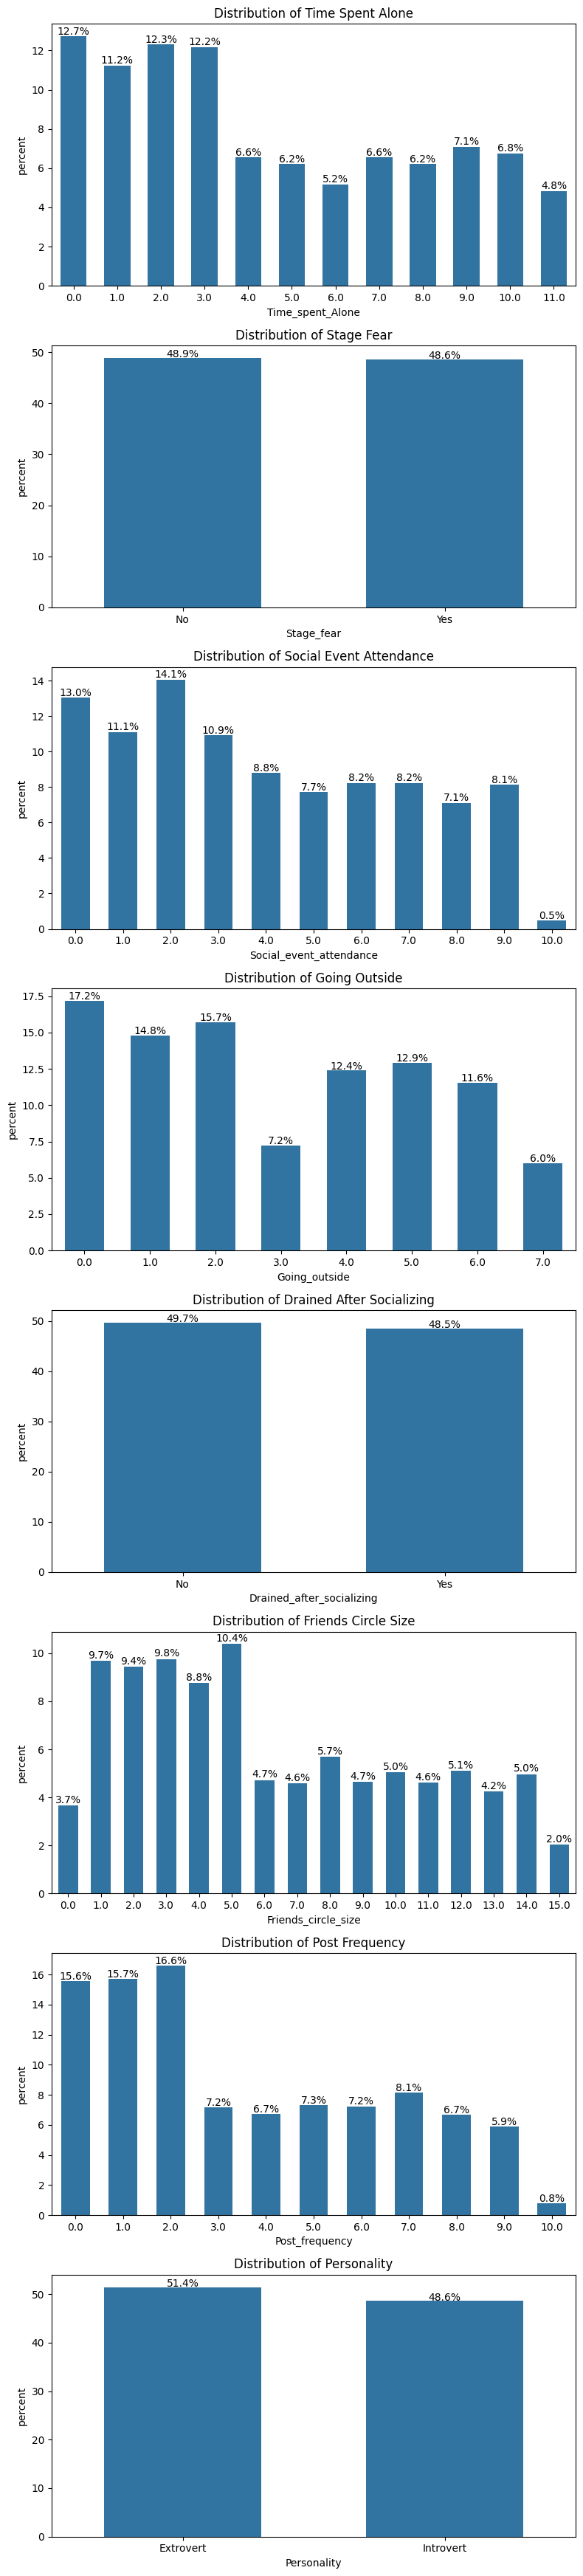

In [181]:
plt.figure(figsize=(8, 35))

for i, name in enumerate(dataset.columns):
    plt.subplot(len(dataset.columns), 1, i + 1)
    plt.title("Distribution of " + " ".join(name.split("_")).title())
    ax = sns.countplot(data=dataset, x=name, stat="percent", width=0.6)

    # Add percentage labels on bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 0.1,
                f"{height:.1f}%",
                ha="center",
            )


plt.tight_layout()
plt.show()

Insights:
1. **Time Spent Alone**
   * The data shows a **bimodal or balanced spread**, but with **slightly more density in the 0–3 range**.
   * Presumption: Likely, **extroverts are skewing the lower values**, spending less time alone.
     * Hypothesis: **Introverts may dominate the higher ranges (7–11 hours)**.
2. **Stage Fear**
   * Nearly a **50/50 split** between “Yes” and “No.”
   * Presumption: Could be **evenly distributed** across personalities, or perhaps **slightly more introverts** report stage fear.
   * Hypothesis: If aligned with expectations, **introverts may report more stage fear**, but the difference may be subtle.
3. **Social Event Attendance**
   * Highest frequencies observed at **0–3 events** per week.
   * Presumption: The general population is **not highly socially active**.
   * Hypothesis: **Introverts may dominate the low end (0–2)**, and **extroverts could appear more in the 4+ range**.
4. **Going Outside**
   * Peak attendance at **0–2 times**, with a gradual drop after.
   * Presumption: Many individuals do not frequently go outside.
   * Hypothesis: **Introverts are likely contributing more to lower frequencies**; **extroverts may go out more often**.
5. **Drained After Socializing**
   * Near-even split again (~50/50).
   * Presumption: Possibly personality-linked.
   * Hypothesis: **Introverts may report being more drained**, while **extroverts report “No”**.
6. **Friends Circle Size**
   * Most common friend circle sizes are **1–5 close friends**.
   * Presumption: Moderate social networks are the norm.
   * Hypothesis: **Extroverts might skew toward the higher range**, with **introverts favoring the lower-middle**.
7. **Post Frequency**
   * Peaks at **0–3 posts per week**, drops gradually after.
   * Presumption: Most people post infrequently.
   * Hypothesis: **Introverts are more represented in the 0–3 range**; **extroverts likely post more actively**.
8. **Personality**
   * **Even 50/50 split** between Introverts and Extroverts.

## Multivariate Analysis

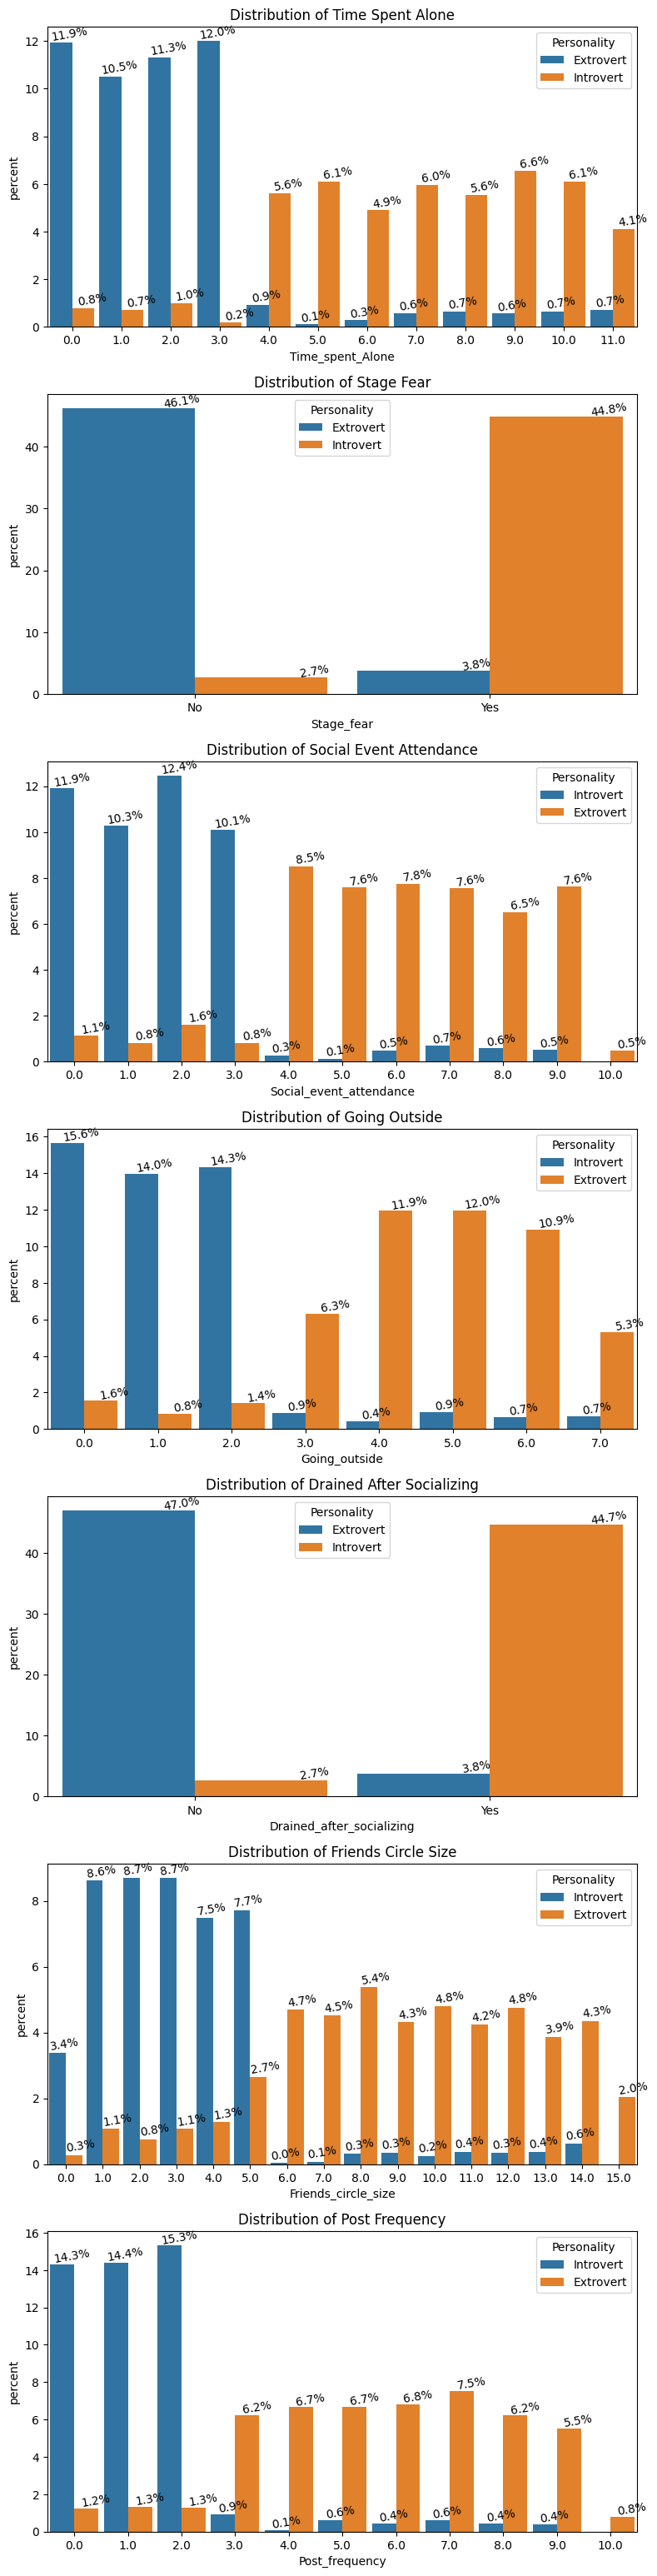

In [182]:
plt.figure(figsize=(8, 35))

for i, name in enumerate(dataset.columns[:-1]):
    plt.subplot(len(dataset.columns), 1, i + 1)
    plt.title("Distribution of " + " ".join(name.split("_")).title())
    ax = sns.countplot(
        data=dataset, x=name, stat="percent", width=0.9, hue="Personality"
    )

    # Add percentage labels on bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() * 0.9,
                height + 0.1,
                f"{height:.1f}%",
                ha="center",
                rotation=10,
            )

plt.tight_layout()
plt.show()

Insights:
1. **Time Spent Alone**
   * **Introverts**: Concentrated at **4–11 hours alone**.
   * **Extroverts**: Skewed toward **0–3 hours alone**.
   * **Strong differentiation** — introverts consistently spend more time alone.
   * This variable is a **strong behavioral separator** between personality types.
2. Stage Fear
   * **Introverts**: ~45% report having stage fear.
   * **Extroverts**: ~46% report *not* having stage fear.
   * Moderate difference, but:
     * More extroverts are stage-confident.
     * More introverts have stage fear.
   * Slight trend toward extroverts being more stage-comfortable, but **not definitive**.
3. Social Event Attendance
   * **Extroverts dominate high attendance** (values 4–10).
   * **Introverts dominate low attendance** (0–3).
   * **Clear personality divide** — extroverts are significantly more socially active.
4. **Going Outside**
   * **Extroverts**: Consistently higher at **4–7 times/week**.
   * **Introverts**: Mostly at **0–2 times/week**.
   * Going outside correlates positively with extroversion, suggesting **more outward-facing activity**.
5. **Drained After Socializing**
   * **Introverts**: 44.7% feel drained after socializing.
   * **Extroverts**: 47% do *not* feel drained.
   * This is **one of the strongest differentiators**.
   * Feeling drained after social interaction aligns well with personality classification.
6. **Friends Circle Size**
   * **Extroverts**: More common in **6–15 friends** range.
   * **Introverts**: Clustered at **0–5 friends**.
   * Friend circle size increases with extroversion, reflecting **larger social networks**.
7. **Post Frequency**
   * **Introverts**: Most common values **0–2 posts**.
   * **Extroverts**: Higher frequency **3–10 posts** is common.
   * **Post frequency is a good behavioral indicator of extroversion**, likely tied to expressive tendencies.

# **5. Data Preprocessing**

## Handling Missing Value

In [183]:
dataset.dropna(subset="Personality", inplace=True)

na_cols = dataset.columns[dataset.isna().any()]
personality_groups = dataset.groupby("Personality")

for col in na_cols:
    if dataset[col].dtype == "O":
        dataset[col] = dataset[col].fillna(
            dataset.groupby("Personality")[col].transform(lambda x: x.mode().iloc[0])
        )
    else:
        dataset[col] = dataset[col].fillna(
            dataset.groupby("Personality")[col].transform("median")
        )

## Handling Duplicate Data

In [184]:
dataset.drop_duplicates(inplace=True)

## Encoding

In [185]:
dataset.loc[:, "Stage_fear"] = dataset["Stage_fear"].map({"No": 0, "Yes": 1})
dataset.loc[:, "Drained_after_socializing"] = dataset["Drained_after_socializing"].map(
    {"No": 0, "Yes": 1}
)
dataset.loc[:, "Personality"] = dataset["Personality"].map(
    {"Extrovert": 0, "Introvert": 1}
)

## Binning

In [186]:
dataset["has_lower_time_spent_alone"] = (dataset["Time_spent_Alone"] < 4).astype(int)
dataset["has_lower_social_event_attendance"] = (
    dataset["Social_event_attendance"] < 4
).astype(int)
dataset["has_lower_going_outside_count"] = (dataset["Going_outside"] < 3).astype(int)
dataset["has_lower_friends_circle"] = (dataset["Friends_circle_size"] < 6).astype(int)
dataset["has_lower_post_frequency"] = (dataset["Post_frequency"] < 3).astype(int)

## Renaming and Dropping Original Columns

In [187]:
dataset.rename(
    columns={
        "Stage_fear": "has_stage_fear",
        "Drained_after_socializing": "is_drained_after_socializing",
    },
    inplace=True,
)

dataset.drop(
    columns=[
        "Time_spent_Alone",
        "Social_event_attendance",
        "Going_outside",
        "Friends_circle_size",
        "Post_frequency",
    ],
    inplace=True,
)